In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib 
#from sklearn.linear_model import LinearRegression as lr
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from statistics import mean

In [5]:
trainData = pd.read_csv("../Data/train.csv", index_col = 0)
testData = pd.read_csv("../Data/test.csv", index_col = 0)
mean_value = trainData['Age'].mean()
trainData['Age'] = trainData['Age'].fillna(29.7)
testData['Fare'] = testData['Fare'].fillna(testData['Fare'].mean())

In [6]:
xTrain = trainData[["Pclass", "SibSp", "Parch", "Fare","Embarked","Sex"]]
xTrain = pd.concat([xTrain, pd.get_dummies(xTrain["Embarked"],prefix = "Embarked")],axis = 1)
xTrain = pd.concat([xTrain, pd.get_dummies(xTrain["Sex"],prefix = "Sex")],axis = 1)
xTrain.drop(["Embarked","Sex"],axis = 1, inplace = True)

yTrain = trainData["Survived"]


xTest = testData[["Pclass", "SibSp", "Parch", "Fare","Embarked","Sex"]]
xTest = pd.concat([xTest, pd.get_dummies(xTest["Embarked"],prefix = "Embarked")],axis = 1)
xTest = pd.concat([xTest, pd.get_dummies(xTest["Sex"],prefix = "Sex")],axis = 1)
xTest.drop(["Embarked","Sex"],axis = 1, inplace = True)

In [7]:
# print(trainData.head(20))
print(xTest.head(20))

             Pclass  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
PassengerId                                                          
892               3      0      0   7.8292           0           1   
893               3      1      0   7.0000           0           0   
894               2      0      0   9.6875           0           1   
895               3      0      0   8.6625           0           0   
896               3      1      1  12.2875           0           0   
897               3      0      0   9.2250           0           0   
898               3      0      0   7.6292           0           1   
899               2      1      1  29.0000           0           0   
900               3      0      0   7.2292           1           0   
901               3      2      0  24.1500           0           0   
902               3      0      0   7.8958           0           0   
903               1      0      0  26.0000           0           0   
904               1 

In [11]:
x_train, x_test, y_train, y_test = train_test_split(xTrain,yTrain, test_size = 0.4, random_state = 1) 

In [12]:
scores = []
for k in range(1, 150):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

0.6610644257703081 0
0.6722689075630253 1
0.7338935574229691 2
0.7002801120448179 3
0.7338935574229691 4
0.6890756302521008 5
0.7254901960784313 6
0.7058823529411765 7
0.7170868347338936 8
0.7254901960784313 9
0.7254901960784313 10
0.7366946778711485 11
0.7366946778711485 12
0.7563025210084033 13
0.7507002801120448 14
0.7478991596638656 15
0.7563025210084033 16
0.7394957983193278 17
0.7338935574229691 18
0.7226890756302521 19
0.7282913165266106 20
0.7310924369747899 21
0.711484593837535 22
0.6862745098039216 23
0.6750700280112045 24
0.6414565826330533 25
0.6526610644257703 26
0.6526610644257703 27
0.6582633053221288 28
0.6498599439775911 29
0.6582633053221288 30
0.6666666666666666 31
0.6750700280112045 32
0.6694677871148459 33
0.6582633053221288 34
0.6554621848739496 35
0.6554621848739496 36
0.6526610644257703 37
0.6470588235294118 38
0.6470588235294118 39
0.6498599439775911 40
0.6470588235294118 41
0.6498599439775911 42
0.6610644257703081 43
0.6582633053221288 44
0.6610644257703081 45

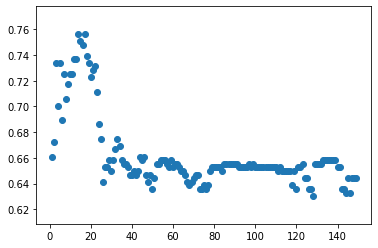

In [13]:
%matplotlib inline
for i in range(len(scores)):
    print(scores[i],i)
plt.scatter(list(range(1,150)), scores)
print(max(scores))

In [8]:
print(xTrain.shape)
print(yTrain.shape)

(891, 9)
(891,)


100%|████████████████████████████████████████████████████████████████████████████████| 149/149 [00:16<00:00,  9.24it/s]


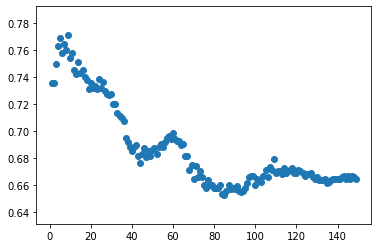

In [9]:
# from sklearn import KFold
# kf = KFold(n_split = 5,shuffle = false).split(range(891))
scores = []
from sklearn.model_selection import cross_val_score
for k in tqdm(range(1,150)):
    knn = KNeighborsClassifier(n_neighbors = k)
    kscores = cross_val_score(knn,xTrain,yTrain,cv = 10,scoring = "accuracy")
    scores.append(kscores.mean())
plt.scatter(list(range(1,150)),scores)

In [10]:
print(scores.index(max(scores)))
print(scores[16])

8
0.7397565543071162


In [11]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(xTrain, yTrain)
result = knn.predict(xTest)
print(result)

[0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 1 1 0 0 1 0 0 0]


In [12]:
import csv

with open('../Results/Version_1.csv', mode='w', newline='') as file:
    file_writer = csv.writer(file, delimiter=',')
    file_writer.writerow(['PassengerId', 'Survived'])
    for i in range(len(result)):
        file_writer.writerow([i+892, result[i]])

In [34]:
#for train data
results = []
from sklearn.ensemble import RandomForestClassifier
for i in tqdm(range(100)):
    clf = RandomForestClassifier(n_estimators = 100,random_state=1,warm_start=True)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    results.append(metrics.accuracy_score(y_test, y_pred))
# feature_imp = pd.Series(clf.feature_importances_,index=["Pclass","SibSp","Parch","Fare","Embarked_C","Embarked_Q","Embarked_S","Sex_female","Sex_male"]).sort_values(ascending=False)
# print(feature_imp)
print(mean(results))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.56it/s]


0.7871148459383753


n_estimators = 100 : 0.7823529411764706
n_estimators = 500 : 0.7817086834733894
n_estimators = 50 : 0.783249299719888
n_estimators = 100,bootstrap=False : 0.7751820728291317
n_estimators = 100,criterion='entropy' : 0.7815966386554621
n_estimators = 100,oob_score=True : 0.7835014005602241
n_estimators = 100,random_state=1 : 0.7871148459383753

In [16]:
# for test data
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(xTrain,yTrain)
y_pred = clf.predict(xTest)
print(y_pred)
print(len(y_pred))

[0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 0 1 0 1 1 0 0 1 0 0 1]
418


In [17]:
with open('../Results/Version_2.csv', mode='w', newline='') as file:
    file_writer = csv.writer(file, delimiter=',')
    file_writer.writerow(['PassengerId', 'Survived'])
    for i in range(len(result)):
        file_writer.writerow([i+892, y_pred[i]])